In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Read the dataset
data = pd.read_csv("C:/Users/Sambhav/Downloads/Data_loan_pred.csv")

# Preprocess the data
data['Dependents'].replace('3+', 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(float)
data.fillna(data.mean(), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

# Define the feature columns and the target column
feature_columns = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Property_Area'
]
target_column = 'Loan_Status'

# Split the dataset into train and test sets
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessor for handling categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']),
        ('cat', OneHotEncoder(), ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']),
    ])

# Create a pipeline with the preprocessor and the random forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.76
              precision    recall  f1-score   support

           N       0.78      0.42      0.55        43
           Y       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



C:\Users\Sambhav\AppData\Local\Temp\ipykernel_1636\2308079851.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


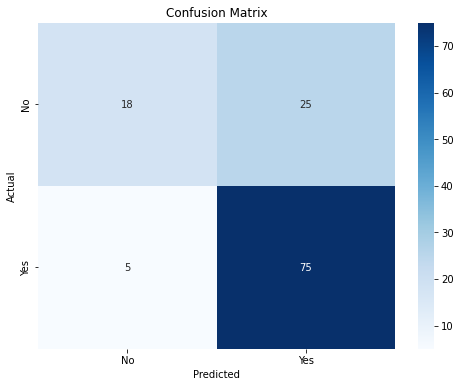

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# List of classifiers to compare
classifiers = [('K-Nearest Neighbors', KNeighborsClassifier())]

# Function to calculate specificity
def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Loop through classifiers, train, make predictions, and print evaluation metrics
for name, clf in classifiers:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='Y')
    rec = recall_score(y_test, y_pred, pos_label='Y')
    spec = specificity(cm)
    f1 = f1_score(y_test, y_pred, pos_label='Y')

    print(f"{name}:")
    print(f"  Accuracy: {acc:.2f}")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall: {rec:.2f}")
    print(f"  Specificity: {spec:.2f}")
    print(f"  F1 Score: {f1:.2f}\n")


K-Nearest Neighbors:
  Accuracy: 0.72
  Precision: 0.72
  Recall: 0.93
  Specificity: 0.33
  F1 Score: 0.81

